# Advanced Clustering

Run the code below to download the bank marketing dataset and read it as a Pandas dataframe.

This dataset represents a marketing campaign made by a Portuguese bank where they contacted a number of their customers and asked their personal consumer price index score and consumer confidence index score. Using this data, the bank believes they can segment their customers for an upcoming marketing campaign.
    
We'll do that by using single linkage clustering to segment the data.</span></p>

In [1]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/125/bank_marketing.csv"

urlretrieve(url, "bank_marketing.csv")

bank_marketing_dataset = pd.read_csv("bank_marketing.csv",index_col=0)
bank_marketing_dataset.head()

,consumer_price_index,consumer_confidence_index
Customer ID,,
1,93.994,-36.4
2,93.994,-36.4
3,93.994,-36.4
4,93.994,-36.4
5,93.994,-36.4


<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the dataset.

In [2]:
#Imports the Min Max Scaler
#This is more versatile than Absolute Max Scaling
#But doesn't require the data to be normally distributed
from sklearn.preprocessing import MinMaxScaler

#min_max_scaler contains the scaled dataset
#But this outputs the data as a NumPy array, so we lose the column names
min_max_scaler = MinMaxScaler().fit_transform(bank_marketing_dataset)
#This stores the dataset in a Pandas dataframe
#It uses the column names from the original dataset
scaled_dataset = pd.DataFrame(min_max_scaler, columns=bank_marketing_dataset.columns)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Plot the scaled data in a scatter plot, ensuring that the axes are scaled. Determine the number of clusters.

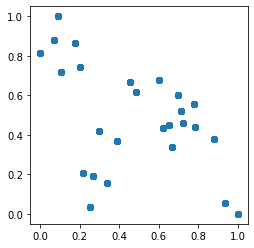

In [3]:
#Before we plot the data we need to import the matplotlib library
import matplotlib.pyplot as plt

#We use the scatter function to create a scatter plot
plt.scatter(scaled_dataset["consumer_price_index"],scaled_dataset["consumer_confidence_index"])
#We use the axis function to ensure that the axes are scaled
#This lets us see the "true" shape of the data
plt.axis("scaled")
plt.show()
#Based on the result below, it looks like there are 4 distinct clusters

<hr style="height:2px;border-width:0;color:black;background-color:black">

Perform single linkage clustering on the data.

In [4]:
#Imports the AgglomerativeClustering function
from sklearn.cluster import AgglomerativeClustering

#Stores the AgglomerativeClustering and sets parameters
#n_clusters was set to 4 as it looked like there were 4 clusters in the scatter plot
slc = AgglomerativeClustering(n_clusters=4,linkage='single')
#The cluster variable stores the list of cluster assignments for each data point
cluster = slc.fit_predict(scaled_dataset)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Plot the data on the unscaled dataset (but don't scale the axes) to see how the SLC algorithm clustered the data.

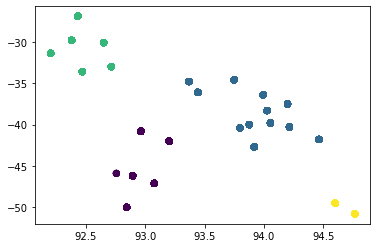

In [5]:
#We use the scatter function again on the original dataset
#This time we set the c variable to match the cluster variable
#This ensures that the color of the data points matches the clusters
plt.scatter(bank_marketing_dataset["consumer_price_index"],bank_marketing_dataset["consumer_confidence_index"],c=cluster)
plt.show()
#In the plot below, it looks like SLC was quite effective at separating the clusters

Run the code below to download the bank marketing dataset and read it as a Pandas dataframe.

This dataset represents a marketing campaign made by a Portuguese bank where they contacted a number of their customers and asked their personal consumer price index score and consumer confidence index score. Using this data, the bank believes they can segment their customers for an upcoming marketing campaign.
    
We'll do that by using soft clustering to segment the data.</span></p>

In [6]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/125/bank_marketing.csv"

urlretrieve(url, "bank_marketing.csv")

bank_marketing_dataset = pd.read_csv("bank_marketing.csv",index_col=0)
bank_marketing_dataset.head()

,consumer_price_index,consumer_confidence_index
Customer ID,,
1,93.994,-36.4
2,93.994,-36.4
3,93.994,-36.4
4,93.994,-36.4
5,93.994,-36.4


<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the dataset.

In [7]:
#Imports the Min Max Scaler
#This is more versatile than Absolute Max Scaling
#But doesn't require the data to be normally distributed
from sklearn.preprocessing import MinMaxScaler

#min_max_scaler contains the scaled dataset
#But this outputs the data as a NumPy array, so we lose the column names
min_max_scaler = MinMaxScaler().fit_transform(bank_marketing_dataset)
#This stores the dataset in a Pandas dataframe
#It uses the column names from the original dataset
scaled_dataset = pd.DataFrame(min_max_scaler, columns=bank_marketing_dataset.columns)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Plot the scaled data in a scatter plot, ensuring that the axes are scaled. Determine the number of clusters.

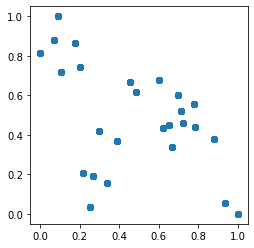

In [8]:
#Before we plot the data we need to import the matplotlib library
import matplotlib.pyplot as plt

#We use the scatter function to create a scatter plot
plt.scatter(scaled_dataset["consumer_price_index"],scaled_dataset["consumer_confidence_index"])
#We use the axis function to ensure that the axes are scaled
#This lets us see the "true" shape of the data
plt.axis("scaled")
plt.show()
#Based on the result below, it looks like there are 4 distinct clusters

<hr style="height:2px;border-width:0;color:black;background-color:black">

Perform soft clustering on the data.

In [9]:
#Imports the FCM function
from fcmeans import FCM

#Stores the FCM function in a variable
#Sets the number of clusters to 4
fcm = FCM(n_clusters=4)
fcm.fit(min_max_scaler)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create an array that outputs the probabilities that each data point is contained within each cluster.

In [10]:
#We use the soft_predict function to create these labeLs
#We need to apply this function to an array
#The min_max_scaler variable contains our data in the array format
fcm_labels = fcm.soft_predict(min_max_scaler)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Plot the data on the unscaled dataset (but don't scale the axes) to see how the SLC algorithm clustered the data.

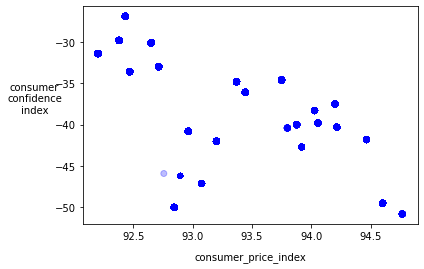

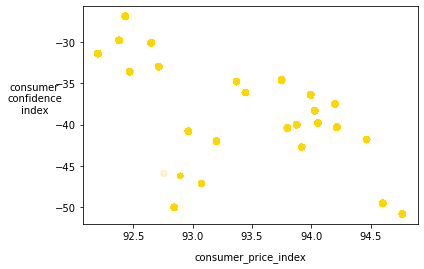

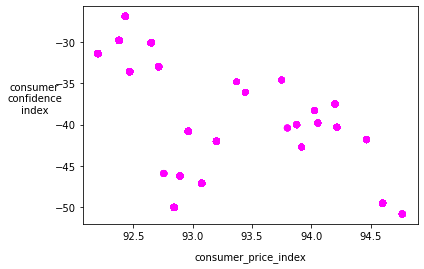

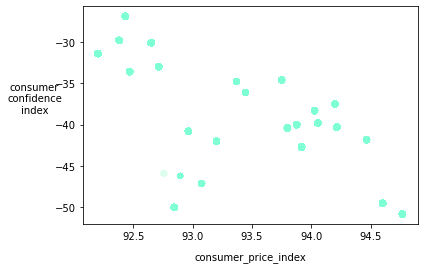

In [11]:
#Imports the functions needed for the custom function to run
from matplotlib.colors import to_rgb, to_rgba

#The function below allows us to create a scatter plot with varying alpha (transparency) for each data point
def alpha_arr_scatter(x, y, color, alpha_arr):
    r, g, b = to_rgb(color)
    # r, g, b, _ = to_rgba(color)
    color = [(r, g, b, alpha) for alpha in alpha_arr]
    plt.scatter(x, y, c=color)

#The variable below lets us specify which colors to use in the outputted charts
colors=["blue","gold","magenta","aquamarine"]

#Because we need a different scatter plot for each cluster, we need to create a for loop
#This iterates through each cluster and assigns a different color for each one
for i in range(0,4):
    #We start by using the custom function from above
    #We can use the original dataset instead of the scaled one
    alpha_arr_scatter(bank_marketing_dataset["consumer_price_index"],bank_marketing_dataset["consumer_confidence_index"]
                #We set the c argument to iterate through the colors variable so we have a different color for each chart
                ,color=colors[i]
                #We set the alpha_arr to iterate through the columns in the fcm_labels array
                ,alpha_arr=fcm_labels[:,i])
    plt.xlabel("consumer_price_index",labelpad=10)    
    plt.ylabel("consumer\nconfidence\nindex", rotation=0,labelpad=20)
    plt.show()
#As we can see, soft clustering isn't working well here
#It seems to be placing most values into the same cluster
#It looks like SLC was a better match for this dataset